In [110]:
import dask.dataframe as dd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [111]:
dir = "./data/random/"
real = dd.read_parquet(dir+"data.parquet", columns=["spec","variant","real.tests", "real.downs"])
squished = dd.read_parquet(dir+"squished.parquet", columns=["spec","variant","limit.tests", "limit.downs", "approx.downs"])
opti = dd.read_parquet(dir+"optimized.parquet", index=["spec"],columns=["variant","comb", "real.tests", "real.downs", "size"])
squished = squished.groupby(["spec", "variant"]).max()

real_max = real.groupby(["spec", "variant"]).max()

In [112]:
comparison_squished = real_max.join(squished, on=["spec", "variant"]).compute()
comparison_squished = comparison_squished.sort_values("spec")

<AxesSubplot:xlabel='spec'>

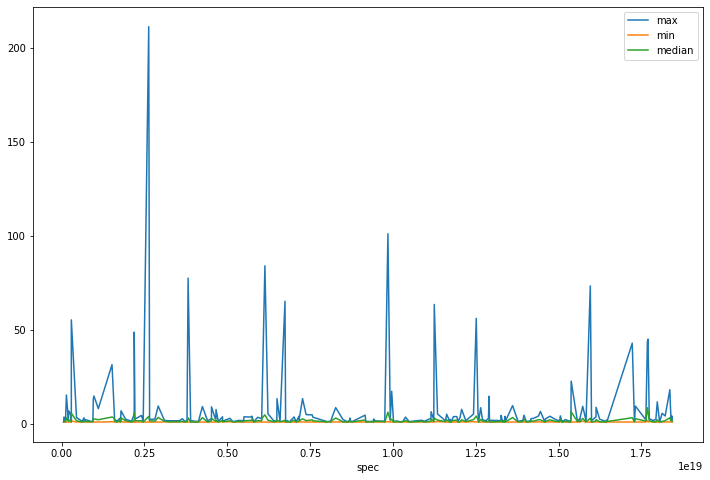

In [113]:
(comparison_squished["limit.tests"]/comparison_squished["real.tests"]).groupby("spec").agg(["max", "min", "median"]).plot(figsize=(12,8))

<AxesSubplot:xlabel='spec,variant'>

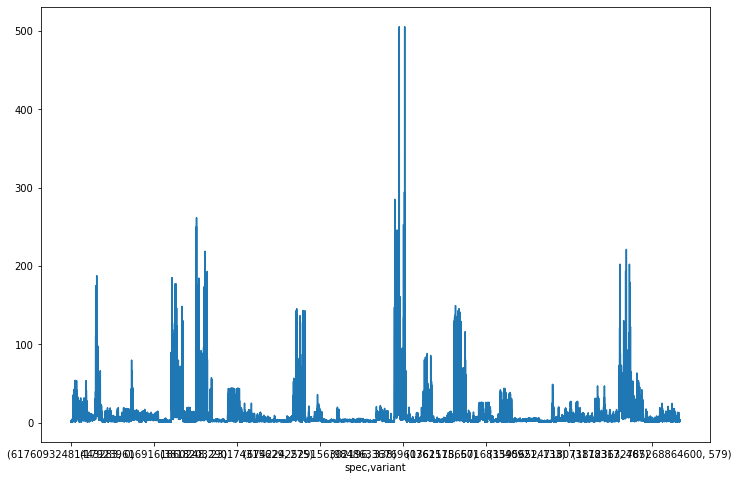

In [114]:
(comparison_squished["limit.downs"]/comparison_squished["real.downs"]).plot(figsize=(12,8))

<AxesSubplot:xlabel='spec,variant'>

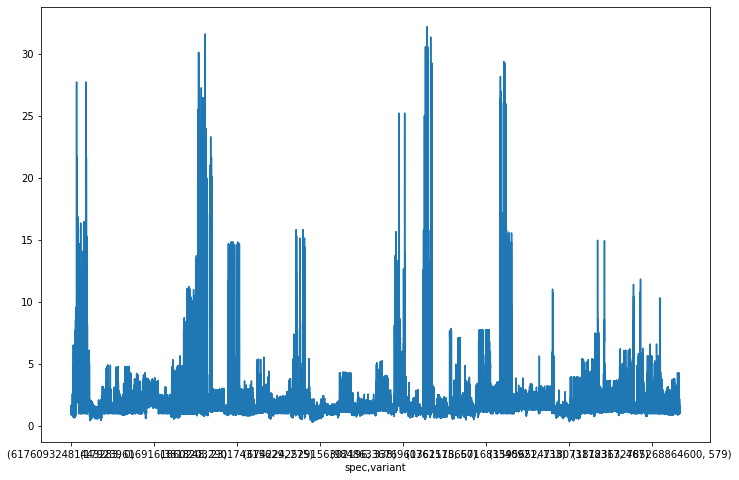

In [115]:
(comparison_squished["approx.downs"]/comparison_squished["real.downs"]).plot(figsize=(12,8))

In [116]:
opti_max = opti.groupby("spec").max()
real_statistics = real_max.groupby("spec").aggregate(["min", "max", "mean"])
compare = real_statistics.join(opti_max)
comparison = compare.compute()

/home/paulra/Code/ccsl-rs/plotter/venv/lib/python3.8/site-packages/pandas/core/reshape/merge.py:648: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)
/home/paulra/Code/ccsl-rs/plotter/venv/lib/python3.8/site-packages/pandas/core/reshape/merge.py:648: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


/home/paulra/Code/ccsl-rs/plotter/venv/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


<AxesSubplot:xlabel='spec'>

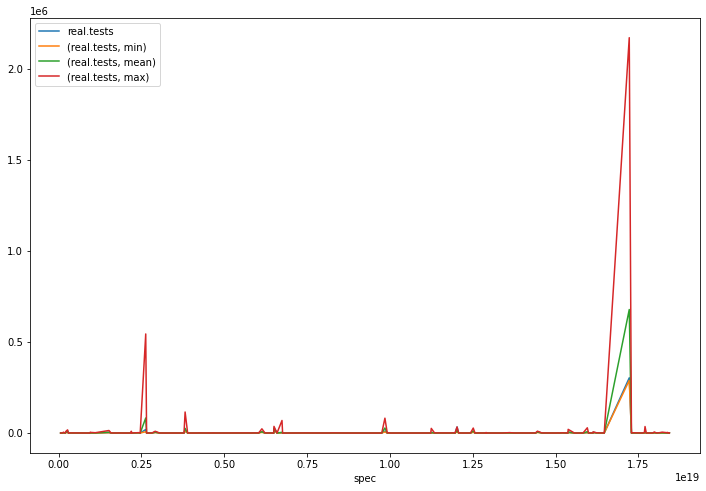

In [117]:
comparison[["real.tests", ("real.tests", "min"), ("real.tests", "mean"), ("real.tests", "max")]].plot(figsize=(12, 8))

In [118]:
comparison[comparison["real.tests"] >= comparison[("real.tests", "mean")]]


,"(real.tests, min)","(real.tests, max)","(real.tests, mean)","(real.downs, min)","(real.downs, max)","(real.downs, mean)",variant,comb,real.tests,real.downs,size
spec,,,,,,,,,,,
220407037689805684,982,9114,3682.933333,51,1170,297.983333,366,7,4202,55,6
271626161294329481,5291,17447,9298.666667,214,801,452.200000,20,3,12712,215,5
1792396169161860248,181,680,411.566667,75,179,125.933333,105,3,602,136,6
2410355880371661065,700,2192,1264.466667,62,600,236.033333,712,1,1321,62,6
6051175719559531631,686,3450,1978.700000,9,276,71.300000,72,0,2583,261,5
6500465267131581366,14887,36483,25619.866667,217,1057,553.400000,49,1,26528,309,5
8084471328059753316,62,64,63.000000,35,38,36.500000,15,0,63,35,4
10865733810439793379,84,148,113.333333,36,52,43.333333,1,7,116,44,4
11151797395016862453,175,659,375.000000,34,135,61.900000,5,0,420,49,5


In [119]:

len(comparison[comparison["real.tests"] > comparison[("real.tests", "mean")]])/len(comparison)

0.10454545454545454

In [120]:


comparison[comparison["real.tests"] > comparison[("real.tests", "max")]]

,"(real.tests, min)","(real.tests, max)","(real.tests, mean)","(real.downs, min)","(real.downs, max)","(real.downs, mean)",variant,comb,real.tests,real.downs,size
spec,,,,,,,,,,,


<AxesSubplot:xlabel='spec', ylabel='real.tests'>

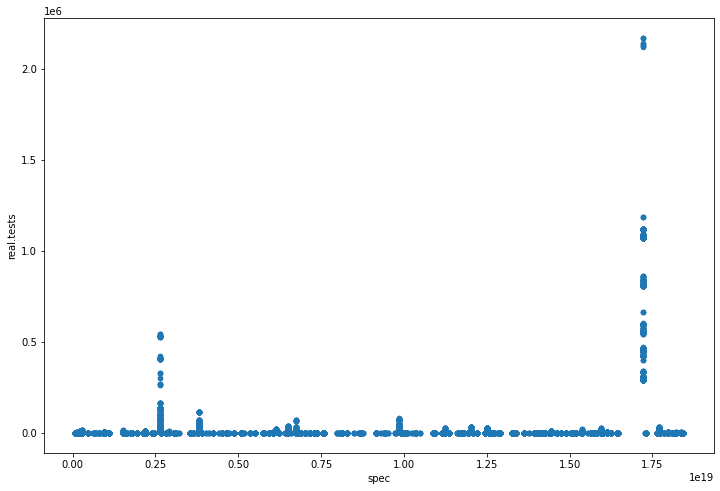

In [121]:
frame = real_max.compute()
frame.reset_index(inplace=True)
frame.plot.scatter(x="spec", y="real.tests", figsize=(12, 8))
